<a href="https://colab.research.google.com/github/RomanAdamczyk/machine-learning-bootcamp/blob/main/supervised/01_basic/02_missing_values.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import sklearn

sklearn.__version__

'1.2.2'

In [2]:
data = {
    'size': ['XL', 'L', 'M', 'L', 'M'],
    'color': ['red', 'green', 'blue', 'green', 'red'],
    'gender': ['female', 'male', 'male', 'female', 'female'],
    'price': [199.0, 89.0, 99.0, 129.0, 79.0],
    'weight': [500, 450, 300, 380, 410],
    'bought': ['yes', 'no', 'yes', 'no', 'yes']
}

df_raw = pd.DataFrame(data=data)
df_raw

,size,color,gender,price,weight,bought
0,XL,red,female,199.0,500,yes
1,L,green,male,89.0,450,no
2,M,blue,male,99.0,300,yes
3,L,green,female,129.0,380,no
4,M,red,female,79.0,410,yes


In [3]:
df = df_raw.copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   size    5 non-null      object 
 1   color   5 non-null      object 
 2   gender  5 non-null      object 
 3   price   5 non-null      float64
 4   weight  5 non-null      int64  
 5   bought  5 non-null      object 
dtypes: float64(1), int64(1), object(4)
memory usage: 368.0+ bytes


In [ ]:
for col in ['size', 'color', 'gender', 'bought']:
    df[col] = df[col].astype('category')

df['weight'] = df['weight'].astype('float')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   size    5 non-null      category
 1   color   5 non-null      category
 2   gender  5 non-null      category
 3   price   5 non-null      float64 
 4   weight  5 non-null      float64 
 5   bought  5 non-null      category
dtypes: category(4), float64(2)
memory usage: 740.0 bytes


In [ ]:
df.describe()

,price,weight
count,5.000000,5.000000
mean,119.000000,408.000000
std,48.476799,75.299402
min,79.000000,300.000000
25%,89.000000,380.000000
50%,99.000000,410.000000
75%,129.000000,450.000000
max,199.000000,500.000000


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
price,5.0,119.0,48.476799,79.0,89.0,99.0,129.0,199.0
weight,5.0,408.0,75.299402,300.0,380.0,410.0,450.0,500.0


In [ ]:
df.describe(include=["category"]).T

,count,unique,top,freq
size,5,3,L,2
color,5,3,green,2
gender,5,2,female,3
bought,5,2,yes,3


In [ ]:
df

,size,color,gender,price,weight,bought
0,XL,red,female,199.0,500.0,yes
1,L,green,male,89.0,450.0,no
2,M,blue,male,99.0,300.0,yes
3,L,green,female,129.0,380.0,no
4,M,red,female,79.0,410.0,yes


In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(df['bought'])
le.transform(df['bought'])

array([1, 0, 1, 0, 1])

In [ ]:
le.fit_transform(df['bought'])

array([1, 0, 1, 0, 1])

In [ ]:
le.classes_

array(['no', 'yes'], dtype=object)

In [ ]:
df['bought'] = le.fit_transform(df['bought'])
df

,size,color,gender,price,weight,bought
0,XL,red,female,199.0,500.0,1
1,L,green,male,89.0,450.0,0
2,M,blue,male,99.0,300.0,1
3,L,green,female,129.0,380.0,0
4,M,red,female,79.0,410.0,1


In [ ]:
le.inverse_transform(df['bought']) #powinno powrócić do poprzedniej wersji [yes][no]

array([1, 0, 1, 0, 1])

In [ ]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse_output=False)
encoder.fit(df[["size"]])
encoder.trans

OneHotEncoder(sparse_output=False)

In [ ]:
encoder.transform(df[["size"]])

array([[0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.]])

In [ ]:
encoder.categories_

[array(['L', 'M', 'XL'], dtype=object)]

In [ ]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(drop = "first",  sparse_output=False)
encoder.fit(df[["size"]])
encoder.transform(df[["size"]])

array([[0., 1.],
       [0., 0.],
       [1., 0.],
       [0., 0.],
       [1., 0.]])

In [ ]:
df

,size,color,gender,price,weight,bought
0,XL,red,female,199.0,500.0,yes
1,L,green,male,89.0,450.0,no
2,M,blue,male,99.0,300.0,yes
3,L,green,female,129.0,380.0,no
4,M,red,female,79.0,410.0,yes


In [ ]:
pd.get_dummies(data=df)

,price,weight,size_L,size_M,size_XL,color_blue,color_green,color_red,gender_female,gender_male,bought_no,bought_yes
0,199.0,500.0,0,0,1,0,0,1,1,0,0,1
1,89.0,450.0,1,0,0,0,1,0,0,1,1,0
2,99.0,300.0,0,1,0,1,0,0,0,1,0,1
3,129.0,380.0,1,0,0,0,1,0,1,0,1,0
4,79.0,410.0,0,1,0,0,0,1,1,0,0,1


In [ ]:
pd.get_dummies(data=df, drop_first=True)

,price,weight,size_M,size_XL,color_green,color_red,gender_male,bought_yes
0,199.0,500.0,0,1,0,1,0,1
1,89.0,450.0,0,0,1,0,1,0
2,99.0,300.0,1,0,0,0,1,1
3,129.0,380.0,0,0,1,0,0,0
4,79.0,410.0,1,0,0,1,0,1


In [ ]:
pd.get_dummies(data=df, drop_first=True, prefix="new", prefix_sep="-")

,price,weight,new-M,new-XL,new-green,new-red,new-male,new-yes
0,199.0,500.0,0,1,0,1,0,1
1,89.0,450.0,0,0,1,0,1,0
2,99.0,300.0,1,0,0,0,1,1
3,129.0,380.0,0,0,1,0,0,0
4,79.0,410.0,1,0,0,1,0,1


In [ ]:
pd.get_dummies(data=df, drop_first=True, columns=["size"])

,color,gender,price,weight,bought,size_M,size_XL
0,red,female,199.0,500.0,yes,0,1
1,green,male,89.0,450.0,no,0,0
2,blue,male,99.0,300.0,yes,1,0
3,green,female,129.0,380.0,no,0,0
4,red,female,79.0,410.0,yes,1,0


In [ ]:
print(f"{df['price']}\n")
print(f"Średnia: {df['price'].mean()}")
print(f"Odchylenie standardowe: {df['price'].std():.4f}")

0    199.0
1     89.0
2     99.0
3    129.0
4     79.0
Name: price, dtype: float64

Średnia: 119.0
Odchylenie standardowe: 48.4768


In [ ]:
(df['price'] - df['price'].mean()) / df['price'].std()

0    1.650274
1   -0.618853
2   -0.412568
3    0.206284
4   -0.825137
Name: price, dtype: float64

In [ ]:
from sklearn.preprocessing import scale

scale(df['price'])

array([ 1.84506242, -0.69189841, -0.4612656 ,  0.2306328 , -0.92253121])

In [ ]:
from sklearn.preprocessing import StandardScaler #funkcja lepsza niż scale

scaler = StandardScaler()
scaler.fit(df[['price']])
scaler.transform(df[['price']])

array([[ 1.84506242],
       [-0.69189841],
       [-0.4612656 ],
       [ 0.2306328 ],
       [-0.92253121]])

In [ ]:
scaler = StandardScaler()
df[['price','weight']] = scaler.fit_transform(df[['price','weight']])

In [ ]:
df

,size,color,gender,price,weight,bought
0,XL,red,female,1.845062,1.366002,yes
1,L,green,male,-0.691898,0.623610,no
2,M,blue,male,-0.461266,-1.603567,yes
3,L,green,female,0.230633,-0.415740,no
4,M,red,female,-0.922531,0.029696,yes


In [ ]:
df = df_raw.copy()
df

,size,color,gender,price,weight,bought
0,XL,red,female,199.0,500,yes
1,L,green,male,89.0,450,no
2,M,blue,male,99.0,300,yes
3,L,green,female,129.0,380,no
4,M,red,female,79.0,410,yes


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

In [ ]:
le = LabelEncoder()

df['bought'] = le.fit_transform(df['bought'])

scaler = StandardScaler()
df[['price','weight']] = scaler.fit_transform(df[['price','weight']])

df = pd.get_dummies(data=df, drop_first=True)
df

,price,weight,bought,size_M,size_XL,color_green,color_red,gender_male
0,1.845062,1.366002,1,0,1,0,1,0
1,-0.691898,0.623610,0,0,0,1,0,1
2,-0.461266,-1.603567,1,1,0,0,0,1
3,0.230633,-0.415740,0,0,0,1,0,0
4,-0.922531,0.029696,1,1,0,0,1,0




```
# Sformatowano jako kod
```

# braki danych

In [4]:
import numpy as np
import pandas as pd
import sklearn

sklearn.__version__

'1.2.2'

In [6]:
data = {
    'size': ['XL', 'L', 'M', np.nan, 'M', 'M'],
    'color': ['red', 'green', 'blue', 'green', 'red', 'green'],
    'gender': ['female', 'male', np.nan, 'female', 'female', 'male'],
    'price': [199.0, 89.0, np.nan, 129.0, 79.0, 89.0],
    'weight': [500, 450, 300, np.nan, 410, np.nan],
    'bought': ['yes', 'no', 'yes', 'no', 'yes', 'no']
}

df_raw = pd.DataFrame(data=data)
df_raw

,size,color,gender,price,weight,bought
0,XL,red,female,199.0,500.0,yes
1,L,green,male,89.0,450.0,no
2,M,blue,NaN,NaN,300.0,yes
3,NaN,green,female,129.0,NaN,no
4,M,red,female,79.0,410.0,yes
5,M,green,male,89.0,NaN,no


In [39]:
df = df_raw.copy()
df.info()
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   size    5 non-null      object 
 1   color   6 non-null      object 
 2   gender  5 non-null      object 
 3   price   5 non-null      float64
 4   weight  4 non-null      float64
 5   bought  6 non-null      object 
dtypes: float64(2), object(4)
memory usage: 416.0+ bytes


,size,color,gender,price,weight,bought
0,XL,red,female,199.0,500.0,yes
1,L,green,male,89.0,450.0,no
2,M,blue,NaN,NaN,300.0,yes
3,NaN,green,female,129.0,NaN,no
4,M,red,female,79.0,410.0,yes
5,M,green,male,89.0,NaN,no


In [10]:
df.isnull()


,size,color,gender,price,weight,bought
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,True,True,False,False
3,True,False,False,False,True,False
4,False,False,False,False,False,False
5,False,False,False,False,True,False


In [40]:
df.isnull().sum()

size      1
color     0
gender    1
price     1
weight    2
bought    0
dtype: int64

In [14]:
df.isnull().sum().sum()

5

In [18]:
df.isnull().sum().sum() / len(df)

0.8333333333333334

In [19]:
df[['weight']]

,weight
0,500.0
1,450.0
2,300.0
3,NaN
4,410.0
5,NaN


In [27]:
from sklearn.impute import SimpleImputer

# strategy: 'mean', 'median', 'most_frequent', 'constant'
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer.fit(df[['weight']])

SimpleImputer()

In [28]:
imputer.statistics_

array([415.])

In [25]:
imputer.transform(df[['weight']])

array([[500.],
       [450.],
       [300.],
       [415.],
       [410.],
       [415.]])

In [29]:
df['weight']=imputer.transform(df[['weight']])
df

,size,color,gender,price,weight,bought
0,XL,red,female,199.0,500.0,yes
1,L,green,male,89.0,450.0,no
2,M,blue,NaN,NaN,300.0,yes
3,NaN,green,female,129.0,415.0,no
4,M,red,female,79.0,410.0,yes
5,M,green,male,89.0,415.0,no


In [31]:
imputer = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value = 99.0)
imputer.fit_transform(df[['price']])

array([[199.],
       [ 89.],
       [ 99.],
       [129.],
       [ 79.],
       [ 89.]])

In [33]:
imputer = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value = 'L')
imputer.fit_transform(df[['size']])

array([['XL'],
       ['L'],
       ['M'],
       ['L'],
       ['M'],
       ['M']], dtype=object)

In [42]:
imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imputer.fit_transform(df[['size']])

array([['XL'],
       ['L'],
       ['M'],
       ['M'],
       ['M'],
       ['M']], dtype=object)

In [46]:
pd.isnull(df['weight'])

0    False
1    False
2    False
3     True
4    False
5     True
Name: weight, dtype: bool

In [48]:
df[pd.isnull(df['weight'])]


,size,color,gender,price,weight,bought
3,NaN,green,female,129.0,NaN,no
5,M,green,male,89.0,NaN,no


In [50]:
df[~pd.isnull(df['weight'])]

,size,color,gender,price,weight,bought
0,XL,red,female,199.0,500.0,yes
1,L,green,male,89.0,450.0,no
2,M,blue,NaN,NaN,300.0,yes
4,M,red,female,79.0,410.0,yes


In [53]:
df[pd.notnull(df['weight'])]

,size,color,gender,price,weight,bought
0,XL,red,female,199.0,500.0,yes
1,L,green,male,89.0,450.0,no
2,M,blue,NaN,NaN,300.0,yes
4,M,red,female,79.0,410.0,yes


In [55]:
df.fillna(value='brak')

,size,color,gender,price,weight,bought
0,XL,red,female,199.0,500.0,yes
1,L,green,male,89.0,450.0,no
2,M,blue,brak,brak,300.0,yes
3,brak,green,female,129.0,brak,no
4,M,red,female,79.0,410.0,yes
5,M,green,male,89.0,brak,no


In [59]:
df['size'].fillna(value = 'L', inplace=True)
df

,size,color,gender,price,weight,bought
0,XL,red,female,199.0,500.0,yes
1,L,green,male,89.0,450.0,no
2,M,blue,NaN,NaN,300.0,yes
3,L,green,female,129.0,NaN,no
4,M,red,female,79.0,410.0,yes
5,M,green,male,89.0,NaN,no


In [62]:
df.dropna()

,size,color,gender,price,weight,bought
0,XL,red,female,199.0,500.0,yes
1,L,green,male,89.0,450.0,no
4,M,red,female,79.0,410.0,yes


In [63]:
df = df.dropna()

In [64]:
df

,size,color,gender,price,weight,bought
0,XL,red,female,199.0,500.0,yes
1,L,green,male,89.0,450.0,no
4,M,red,female,79.0,410.0,yes


Braki danych w szeregach czasowych

In [68]:
data = {'price': [108, 109, 110, 110, 109, np.nan, np.nan, 112, 111, 111]}
date_range = pd.date_range(start='01-01-2020 09:00', end='01-01-2020 18:00', periods=10)

df = pd.DataFrame(data=data, index=date_range)
df

,price
2020-01-01 09:00:00,108.0
2020-01-01 10:00:00,109.0
2020-01-01 11:00:00,110.0
2020-01-01 12:00:00,110.0
2020-01-01 13:00:00,109.0
2020-01-01 14:00:00,NaN
2020-01-01 15:00:00,NaN
2020-01-01 16:00:00,112.0
2020-01-01 17:00:00,111.0
2020-01-01 18:00:00,111.0


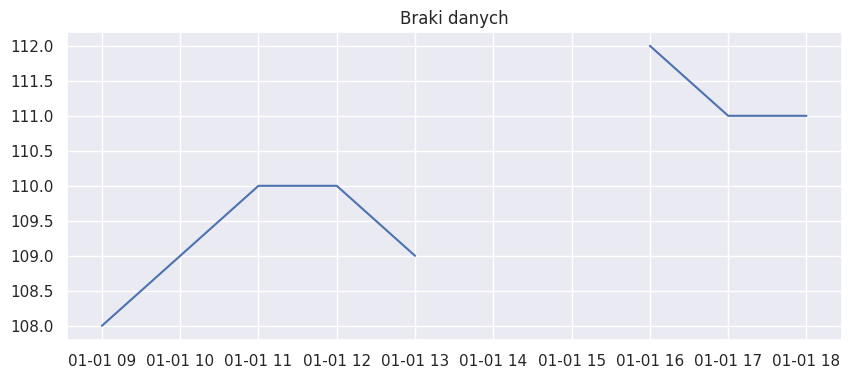

In [70]:
from pandas.plotting import register_matplotlib_converters
import matplotlib.pyplot as plt
import seaborn as sns
register_matplotlib_converters()
sns.set()

plt.figure(figsize=(10, 4))
plt.title('Braki danych')
_ = plt.plot(df.price)

In [72]:
import plotly.express as px

df_plotly = df.reset_index()
px.line(df_plotly, 'index', 'price', width=600, height=400,
        title='Szeregi czasowe - braki danych')

In [74]:
#usunięcie braków
df_plotly = df_plotly.dropna()
px.line(df_plotly, 'index', 'price', width=600, height=400,
        title='Szeregi czasowe - braki danych')

In [77]:
#Wypełnienie braków stałą wartością 0
df_plotly = df.reset_index()
df_plotly['price_fill'] = df_plotly['price'].fillna(0)
px.line(df_plotly, 'index', 'price_fill', width=600, height=400,
        title='Szeregi czasowe - braki danych - wstawienie 0')

In [79]:
#Wypełnienie braków średnią
df_plotly = df.reset_index()
df_plotly['price_fill'] = df_plotly['price'].fillna(df_plotly['price'].mean())
px.line(df_plotly, 'index', 'price_fill', width=600, height=400,
        title='Szeregi czasowe - braki danych - wstawienie średniej')

In [81]:
#Zastosowanie interpolacji

df_plotly = df.reset_index()
df_plotly['price_fill'] = df_plotly['price'].interpolate()
px.line(df_plotly, 'index', 'price_fill', width=600, height=400,
        title='Szeregi czasowe - braki danych - interpolacja')

In [84]:
#Wypełnienie braków metodą forward fill

df_plotly = df.reset_index()
df_plotly['price_fill'] = df_plotly['price'].fillna(method='ffill')
px.line(df_plotly, 'index', 'price_fill', width=600, height=400,
        title='Szeregi czasowe - braki danych - forward fill')

In [85]:
#Wypełnienie braków metodą backward fill

df_plotly = df.reset_index()
df_plotly['price_fill'] = df_plotly['price'].fillna(method='bfill')
px.line(df_plotly, 'index', 'price_fill', width=600, height=400,
        title='Szeregi czasowe - braki danych')